In [ ]:
pip install cv2_imshow

ERROR: Could not find a version that satisfies the requirement cv2_imshow (from versions: none)
ERROR: No matching distribution found for cv2_imshow


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np


# 1.


In [ ]:
img1 = cv.imread("CinqueTerre.jpg")

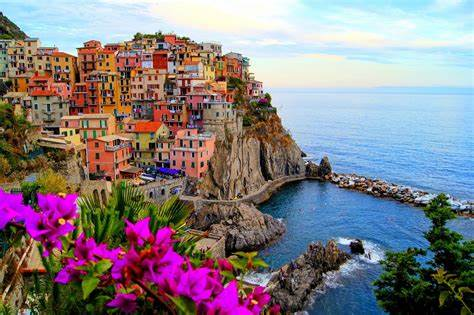

In [ ]:

cv2_imshow(img1)

    a.Find and store the size and number of channels of the image.

In [ ]:
 img1.shape  #Size of the image

(315, 474, 3)

In [ ]:
img1.shape[2] # No of channels

3

    b. Subimage

In [ ]:
subimg1 = img1[1:50, 1:50, :] 
subimg2 = img1[-49 :, -49 :]

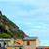

In [ ]:
cv2_imshow(subimg1)

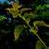

In [ ]:
cv2_imshow(subimg2)

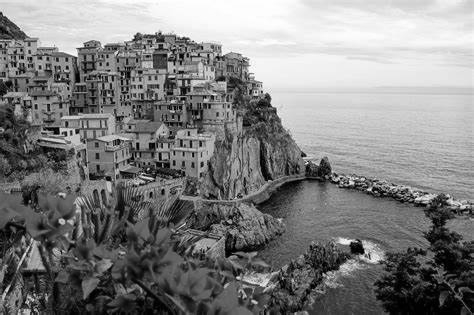

In [ ]:
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
subimg1 = gray[1:50, 1:50] 
subimg2 = gray[-49 :, -49 :]

In [ ]:
SSD = np.sum((subimg1[:,:]- subimg2[:,:])**2)
SSD

259995

#2.

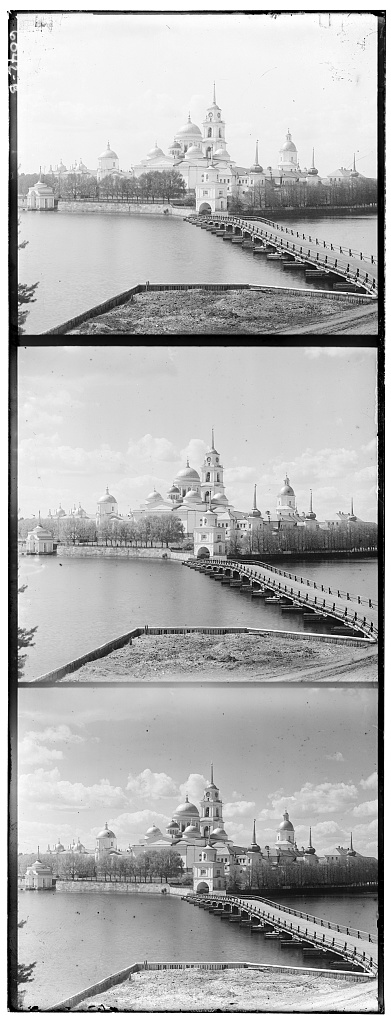

In [27]:
img2 = cv.imread('monastery.jpg')
cv2_imshow(img2)

In [28]:
img2.shape

(1024, 391, 3)

In [29]:
img3=img2/255

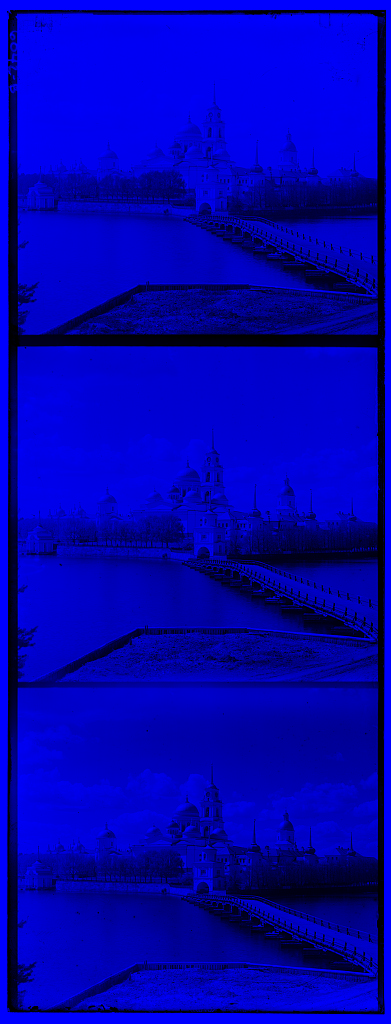

In [30]:
b = img2[:,:,0]
z = np.zeros((1024,391))
bl = np.dstack([b,z,z])
cv2_imshow(bl)

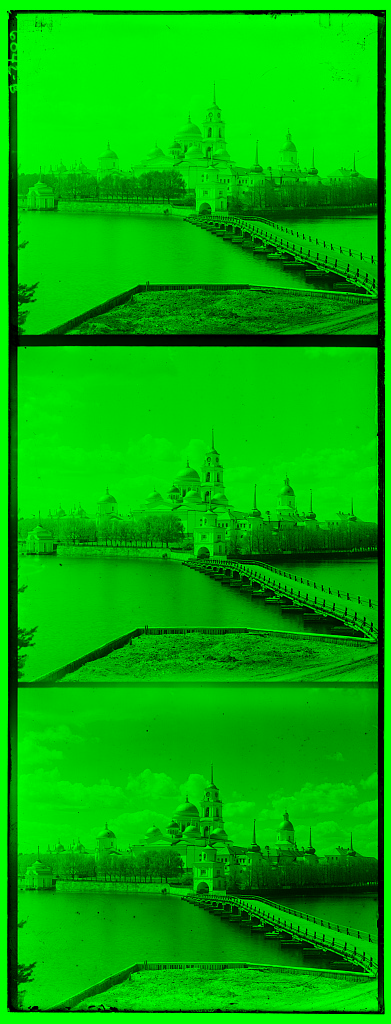

In [31]:
g = img2[:,:,0]
z = np.zeros((1024,391))
gr = np.dstack([z,g,z])
cv2_imshow(gr)

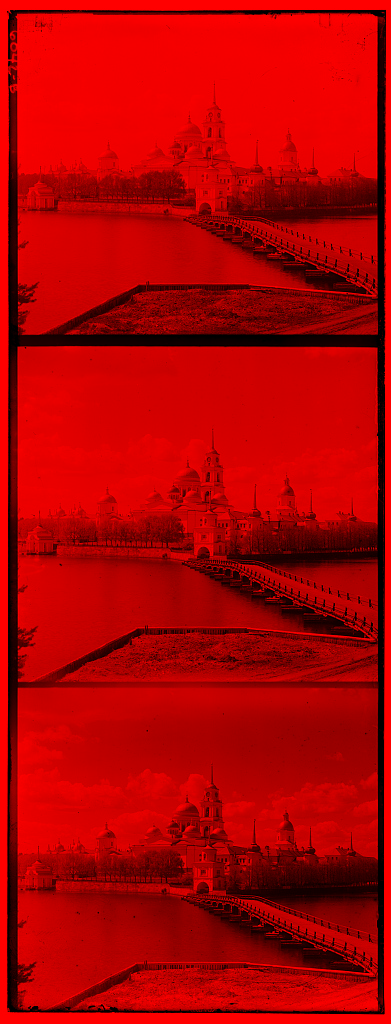

In [32]:
r = img2[:,:,0]
z = np.zeros((1024,391))
red = np.dstack([z,z,r])
cv2_imshow(red)

In [33]:
bl.shape

(1024, 391, 3)

In [34]:
h = np.floor(img3.shape[0] / 3.0).astype(np.int)
blue_channel = img3[:h,:,0]
green_channel = img3[h: 2*h,:,0]
red_channel = img3[2*h: 3*h,:,0]

In [35]:
blue_channel.shape

(341, 391)

In [36]:
def apply(img1, img2):

    best_SSD = -float('inf')
    best_shift = [0, 0]

    for i in range(-10, 11):
        for j in range(-10,11):
            temp_SSD = SSD(np.roll(img1, (i, j), (0, 1)), img2)
            if temp_SSD > best_SSD:
                best_SSD = temp_SSD
                best_shift = (i, j)

    return np.roll(img1, best_shift, (0, 1)), np.array(best_shift),-best_SSD

In [37]:
def SSD(img1, img2):
  return np.sum(np.sum((img1 - img2)**2)) 

In [38]:
def crop_boarder(im):
    img = im[int(0.1 * len(im)):-int(0.1 * len(im)),
              int(0.1 * len(im[0])):-int(0.1 * len(im[0]))]
    return img

In [39]:
ag, g_shift ,best_SSD_g = apply(green_channel, blue_channel)
ar, r_shift,best_SSD_r = apply(red_channel, blue_channel)

Green shift:  [  4 -10]
Red shift:  [  0 -10]
Best SSD green and blue channel:  -14155.660361399463
Best SSD Red and blue channel:  -17356.577516339872


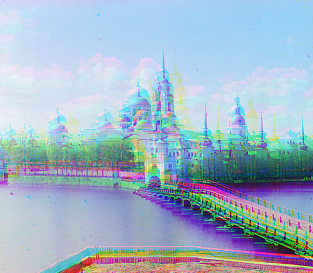

In [41]:
p=np.dstack([blue_channel,ag,ar])
img_out = np.round(p*255,0)
img = crop_boarder(img_out)
print("Green shift: " ,(g_shift))
print("Red shift: " ,(r_shift))
print("Best SSD green and blue channel: " , (best_SSD_g))
print("Best SSD Red and blue channel: " ,(best_SSD_r))
cv2_imshow(img)